## The State of the Housing Market: Using Pandas to analyze housing prices

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

Downloading and Importing Data

In [2]:
# Load All Homes CSV file
Neighborhood_Zhvi_AllHomes = pd.read_csv('Data/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',index_col=[5,7,8,6,2])
# Neighborhood_Zhvi_2bedroom = pd.read_csv('Data/Neighborhood_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',index_col=[5,7,8,6,2])
# Neighborhood_Zhvi_3bedroom = pd.read_csv('Data/Neighborhood_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',index_col=[5,7,8,6,2])

In [3]:
Neighborhood_Zhvi_AllHomes.head()

,,,,,RegionID,SizeRank,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
State,Metro,CountyName,City,RegionName,,,,,,,,,,,,,,,,,,,,,
AZ,"Phoenix-Mesa-Chandler, AZ",Maricopa County,Phoenix,Maryvale,112345,0,neighborhood,AZ,81974.0,82304.0,82711.0,83594.0,84481.0,85250.0,...,295981.0,301081.0,307173.0,313361.0,313287.0,306737.0,299364.0,293834.0,290278.0,290374.0
TX,"Dallas-Fort Worth-Arlington, TX",Dallas County,Dallas,Northeast Dallas,274772,1,neighborhood,TX,153332.0,153428.0,153458.0,153713.0,153888.0,154195.0,...,442138.0,453846.0,462416.0,470650.0,473584.0,475185.0,469998.0,467181.0,464594.0,463915.0
NV,"Las Vegas-Henderson-Paradise, NV",Clark County,Las Vegas,Paradise,192689,2,neighborhood,NV,148473.0,148433.0,148752.0,149375.0,150104.0,150732.0,...,386078.0,393950.0,401665.0,406847.0,408434.0,405945.0,400772.0,394404.0,388112.0,384913.0
NY,"New York-Newark-Jersey City, NY-NJ-PA",New York County,New York,Upper East Side,270957,3,neighborhood,NY,555357.0,559325.0,563258.0,571724.0,582366.0,594330.0,...,1388108.0,1403761.0,1418323.0,1426379.0,1428873.0,1429694.0,1430012.0,1429159.0,1427647.0,1424728.0
CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,Los Angeles,South Los Angeles,118208,4,neighborhood,CA,154777.0,154662.0,154915.0,155573.0,156590.0,157507.0,...,700332.0,713840.0,724567.0,725879.0,725306.0,714673.0,704974.0,693025.0,689863.0,686485.0


In [4]:
Neighborhood_Zhvi_AllHomes.index.to_frame().describe()

,State,Metro,CountyName,City,RegionName
count,21492,21480,21492,21491,21492
unique,51,302,419,884,16644
top,TX,"Dallas-Fort Worth-Arlington, TX",Maricopa County,Nashville,Downtown
freq,3157,1575,854,421,154


Creating a time series dataframe with MultiIndex Columns

In [5]:
Neighborhood_Zhvi_AllHomes
zhvi_timeseries = Neighborhood_Zhvi_AllHomes.T
dates = pd.to_datetime(zhvi_timeseries.index, errors='coerce').dropna()
zhvi_timeseries = zhvi_timeseries.loc[dates.strftime("%Y-%m-%d")]
zhvi_timeseries.index = pd.to_datetime(zhvi_timeseries.index, errors='coerce').dropna()   
zhvi_timeseries.head()

State,AZ,TX,NV,NY,CA,NY,NV,CA,NV,NY,...,TX,MO,GA,TX,NV,AZ,TN,FL,IL,CA
Metro,"Phoenix-Mesa-Chandler, AZ","Dallas-Fort Worth-Arlington, TX","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA","Los Angeles-Long Beach-Anaheim, CA","New York-Newark-Jersey City, NY-NJ-PA","Las Vegas-Henderson-Paradise, NV","Los Angeles-Long Beach-Anaheim, CA","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA",...,"Austin-Round Rock-Georgetown, TX","Columbia, MO","Atlanta-Sandy Springs-Alpharetta, GA","Killeen-Temple, TX","Las Vegas-Henderson-Paradise, NV","Lake Havasu City-Kingman, AZ","Nashville-Davidson--Murfreesboro--Franklin, TN","Orlando-Kissimmee-Sanford, FL","Chicago-Naperville-Elgin, IL-IN-WI",NaN
CountyName,Maricopa County,Dallas County,Clark County,New York County,Los Angeles County,New York County,Clark County,Los Angeles County,Clark County,Kings County,...,Hays County,Boone County,Forsyth County,Bell County,Clark County,Mohave County,Davidson County,Osceola County,Will County,Plumas County
City,Phoenix,Dallas,Las Vegas,New York,Los Angeles,New York,Las Vegas,Los Angeles,Las Vegas,New York,...,San Marcos,Columbia,Cumming,Killeen,North Las Vegas,Willow Beach,Nashville,Kissimmee,Naperville,Westwood
RegionName,Maryvale,Northeast Dallas,Paradise,Upper East Side,South Los Angeles,Upper West Side,Spring Valley,Southeast Los Angeles,Sunrise Manor,Bedford-Stuyvesant,...,Castle Forest,Heritage Estates,Whisper Point,Splawn Ranch,Rome,White Hills,Villages of Long Hunter,The Oaks,Ashwood Crossing,Hamilton Branch
2000-01-31,81974.0,153332.0,148473.0,555357.0,154777.0,392005.0,156540.0,137030.0,134200.0,165396.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,82304.0,153428.0,148433.0,559325.0,154662.0,396040.0,156473.0,137233.0,134188.0,166891.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,82711.0,153458.0,148752.0,563258.0,154915.0,398802.0,156748.0,137629.0,134484.0,167749.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,83594.0,153713.0,149375.0,571724.0,155573.0,405873.0,157374.0,138344.0,135090.0,170097.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,84481.0,153888.0,150104.0,582366.0,156590.0,413360.0,158077.0,139230.0,135774.0,171704.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculating Returns from Price Values

In [6]:
zhvi_timeseries_pct = zhvi_timeseries.pct_change().fillna(0)

In [7]:
zhvi_timeseries_pct_yoy = zhvi_timeseries.pct_change(12).fillna(0)

In [8]:
zhvi_timeseries_pct_yoy.tail()*100

State,AZ,TX,NV,NY,CA,NY,NV,CA,NV,NY,...,TX,MO,GA,TX,NV,AZ,TN,FL,IL,CA
Metro,"Phoenix-Mesa-Chandler, AZ","Dallas-Fort Worth-Arlington, TX","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA","Los Angeles-Long Beach-Anaheim, CA","New York-Newark-Jersey City, NY-NJ-PA","Las Vegas-Henderson-Paradise, NV","Los Angeles-Long Beach-Anaheim, CA","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA",...,"Austin-Round Rock-Georgetown, TX","Columbia, MO","Atlanta-Sandy Springs-Alpharetta, GA","Killeen-Temple, TX","Las Vegas-Henderson-Paradise, NV","Lake Havasu City-Kingman, AZ","Nashville-Davidson--Murfreesboro--Franklin, TN","Orlando-Kissimmee-Sanford, FL","Chicago-Naperville-Elgin, IL-IN-WI",NaN
CountyName,Maricopa County,Dallas County,Clark County,New York County,Los Angeles County,New York County,Clark County,Los Angeles County,Clark County,Kings County,...,Hays County,Boone County,Forsyth County,Bell County,Clark County,Mohave County,Davidson County,Osceola County,Will County,Plumas County
City,Phoenix,Dallas,Las Vegas,New York,Los Angeles,New York,Las Vegas,Los Angeles,Las Vegas,New York,...,San Marcos,Columbia,Cumming,Killeen,North Las Vegas,Willow Beach,Nashville,Kissimmee,Naperville,Westwood
RegionName,Maryvale,Northeast Dallas,Paradise,Upper East Side,South Los Angeles,Upper West Side,Spring Valley,Southeast Los Angeles,Sunrise Manor,Bedford-Stuyvesant,...,Castle Forest,Heritage Estates,Whisper Point,Splawn Ranch,Rome,White Hills,Villages of Long Hunter,The Oaks,Ashwood Crossing,Hamilton Branch
2022-08-31,15.579277,19.892971,22.099004,7.869195,8.829585,8.169705,22.921127,7.424556,23.227195,9.867256,...,15.130075,0.0,25.217409,24.958398,0.0,0.0,30.045354,39.678760,17.430537,15.976289
2022-09-30,11.404935,15.943538,18.110686,6.946850,5.680420,7.311865,19.033645,5.519444,19.282173,8.261676,...,11.250151,0.0,21.772695,23.364186,0.0,0.0,27.681671,34.906288,17.370273,15.901752
2022-10-31,7.537357,13.246391,14.146629,6.247221,3.510569,6.780948,14.970803,4.611340,15.226050,7.557096,...,8.810831,0.0,18.199886,21.592961,0.0,0.0,25.115497,30.664013,17.313482,15.570236
2022-11-30,4.707317,11.690110,10.204928,5.695963,2.759415,6.471537,10.939339,4.408885,11.254164,7.039508,...,6.077923,0.0,16.525226,19.791295,0.0,0.0,19.078237,26.105740,16.821927,14.308474
2022-12-31,2.655712,10.797578,7.522403,5.232494,1.773552,6.191963,8.073736,3.911370,8.588056,7.012690,...,2.845851,0.0,13.782615,17.630772,0.0,0.0,14.435882,22.339521,15.866269,7.227208


In [9]:
# Annualize the monhtly returns
100*((1+zhvi_timeseries_pct).pow(12)-1).tail()

State,AZ,TX,NV,NY,CA,NY,NV,CA,NV,NY,...,TX,MO,GA,TX,NV,AZ,TN,FL,IL,CA
Metro,"Phoenix-Mesa-Chandler, AZ","Dallas-Fort Worth-Arlington, TX","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA","Los Angeles-Long Beach-Anaheim, CA","New York-Newark-Jersey City, NY-NJ-PA","Las Vegas-Henderson-Paradise, NV","Los Angeles-Long Beach-Anaheim, CA","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA",...,"Austin-Round Rock-Georgetown, TX","Columbia, MO","Atlanta-Sandy Springs-Alpharetta, GA","Killeen-Temple, TX","Las Vegas-Henderson-Paradise, NV","Lake Havasu City-Kingman, AZ","Nashville-Davidson--Murfreesboro--Franklin, TN","Orlando-Kissimmee-Sanford, FL","Chicago-Naperville-Elgin, IL-IN-WI",NaN
CountyName,Maricopa County,Dallas County,Clark County,New York County,Los Angeles County,New York County,Clark County,Los Angeles County,Clark County,Kings County,...,Hays County,Boone County,Forsyth County,Bell County,Clark County,Mohave County,Davidson County,Osceola County,Will County,Plumas County
City,Phoenix,Dallas,Las Vegas,New York,Los Angeles,New York,Las Vegas,Los Angeles,Las Vegas,New York,...,San Marcos,Columbia,Cumming,Killeen,North Las Vegas,Willow Beach,Nashville,Kissimmee,Naperville,Westwood
RegionName,Maryvale,Northeast Dallas,Paradise,Upper East Side,South Los Angeles,Upper West Side,Spring Valley,Southeast Los Angeles,Sunrise Manor,Bedford-Stuyvesant,...,Castle Forest,Heritage Estates,Whisper Point,Splawn Ranch,Rome,White Hills,Villages of Long Hunter,The Oaks,Ashwood Crossing,Hamilton Branch
2022-08-31,-22.395751,4.133009,-7.072617,0.691678,-16.240658,2.983003,-6.418451,-12.179380,-5.666713,6.991337,...,-19.217579,0.000000,1.211242,10.912649,1.009400,0.0,12.966181,12.750112,14.523300,21.259274
2022-09-30,-25.320588,-12.340408,-14.264220,0.267237,-15.123258,0.777825,-13.686001,-10.772103,-13.029592,3.105727,...,-8.376825,-0.746266,0.105469,10.546320,-13.942989,0.0,-0.833126,-1.697350,14.218751,21.996597
2022-10-31,-20.047934,-6.959948,-17.486071,-0.713455,-18.546525,0.076200,-18.060766,-6.956732,-17.298044,1.006623,...,-5.002630,1.690740,-5.232116,8.257615,-21.187684,0.0,4.286947,-5.801398,12.255819,11.488716
2022-11-30,-13.593801,-6.446272,-17.550292,-1.262197,-5.339801,-3.335402,-17.701983,3.121435,-16.695345,-0.754871,...,-3.975505,-0.263558,4.021897,4.749843,-24.241680,0.0,-22.561042,-7.658801,4.556051,0.000000
2022-12-31,0.397584,-1.739760,-9.454661,-2.426144,-5.720256,-3.147335,-10.388100,1.081658,-8.138307,-0.426146,...,-11.667623,1.633677,-2.195811,1.328411,-16.837044,0.0,-11.370784,-6.193249,3.141518,-44.199881


Log returns,aka continuously compounded returns

<AxesSubplot: >

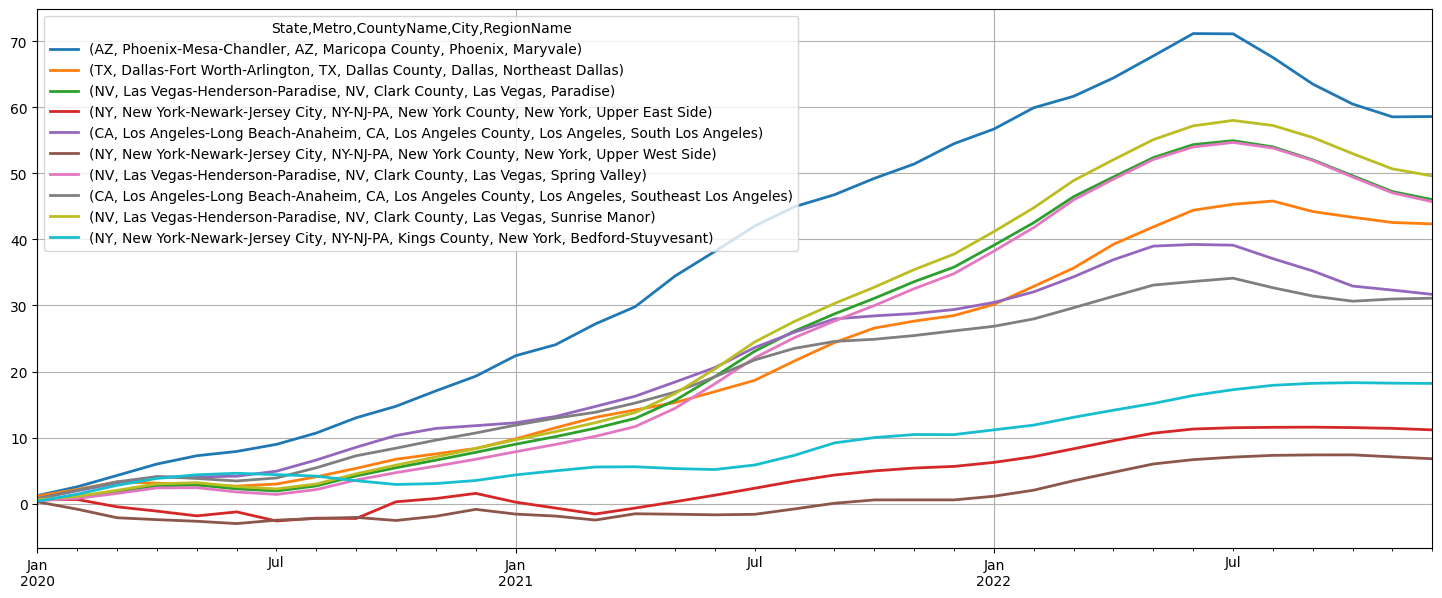

In [10]:
(np.expm1(np.log1p(zhvi_timeseries_pct.iloc[-12*3:,:10]).cumsum())*100).plot(grid = True, figsize = (18,7),linewidth = 2)

Comparing with Simple returns for 3-year periods.

In [15]:
zhvi_timeseries.pct_change(12*3).tail()*100

State,AZ,TX,NV,NY,CA,NY,NV,CA,NV,NY,...,TX,MO,GA,TX,NV,AZ,TN,FL,IL,CA
Metro,"Phoenix-Mesa-Chandler, AZ","Dallas-Fort Worth-Arlington, TX","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA","Los Angeles-Long Beach-Anaheim, CA","New York-Newark-Jersey City, NY-NJ-PA","Las Vegas-Henderson-Paradise, NV","Los Angeles-Long Beach-Anaheim, CA","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA",...,"Austin-Round Rock-Georgetown, TX","Columbia, MO","Atlanta-Sandy Springs-Alpharetta, GA","Killeen-Temple, TX","Las Vegas-Henderson-Paradise, NV","Lake Havasu City-Kingman, AZ","Nashville-Davidson--Murfreesboro--Franklin, TN","Orlando-Kissimmee-Sanford, FL","Chicago-Naperville-Elgin, IL-IN-WI",NaN
CountyName,Maricopa County,Dallas County,Clark County,New York County,Los Angeles County,New York County,Clark County,Los Angeles County,Clark County,Kings County,...,Hays County,Boone County,Forsyth County,Bell County,Clark County,Mohave County,Davidson County,Osceola County,Will County,Plumas County
City,Phoenix,Dallas,Las Vegas,New York,Los Angeles,New York,Las Vegas,Los Angeles,Las Vegas,New York,...,San Marcos,Columbia,Cumming,Killeen,North Las Vegas,Willow Beach,Nashville,Kissimmee,Naperville,Westwood
RegionName,Maryvale,Northeast Dallas,Paradise,Upper East Side,South Los Angeles,Upper West Side,Spring Valley,Southeast Los Angeles,Sunrise Manor,Bedford-Stuyvesant,...,Castle Forest,Heritage Estates,Whisper Point,Splawn Ranch,Rome,White Hills,Villages of Long Hunter,The Oaks,Ashwood Crossing,Hamilton Branch
2022-08-31,70.703434,43.955758,55.015981,12.397415,41.053232,8.300513,54.455855,36.179392,58.457388,15.151779,...,62.733423,NaN,66.833968,60.585042,NaN,NaN,57.507619,67.813974,NaN,36.775246
2022-09-30,65.779156,41.365537,53.680263,12.389282,38.583720,10.305256,53.294879,34.028280,57.274310,16.883469,...,60.600257,NaN,66.537308,61.518100,NaN,NaN,56.299352,67.490028,NaN,39.931555
2022-10-31,62.148411,41.074955,51.125961,12.880980,34.974720,10.624048,50.748797,31.973278,54.618602,17.929352,...,59.543562,NaN,65.324985,61.247664,NaN,NaN,55.871098,67.294386,NaN,41.164604
2022-11-30,59.619699,41.174933,47.967182,12.151845,33.385216,8.829749,47.693798,31.659943,51.518642,18.640524,...,58.864254,NaN,66.027693,59.841872,NaN,NaN,51.805007,65.875111,NaN,41.134288
2022-12-31,58.598051,42.349754,46.024393,11.172773,31.680813,6.801982,45.704900,31.098006,49.609406,18.202346,...,56.724265,NaN,65.384076,58.088558,NaN,NaN,49.398110,64.938833,NaN,34.347930


Indexing and Grouping with MultiIndex

In [12]:
# Indexing by number of rows vs. date period
zhvi_timeseries_pct[['CA']].loc['2021':'2022']

State                                      CA                                  \
Metro      Los Angeles-Long Beach-Anaheim, CA                                   
CountyName                 Los Angeles County                                   
City                              Los Angeles                                   
RegionName                  South Los Angeles Southeast Los Angeles Hollywood   
2021-01-31                           0.003924              0.010801  0.003243   
2021-02-28                           0.008468              0.009383  0.008539   
2021-03-31                           0.013404              0.007872  0.003500   
2021-04-30                           0.013544              0.012299  0.010975   
2021-05-31                           0.018470              0.014291  0.014394   
2021-06-30                           0.018498              0.019857  0.011312   
2021-07-31                           0.025141              0.021502  0.012662   
2021-08-31                           0.018835              0.014371  0.003233   
2021-09-30                           0.015823              0.008431  0.004898   
2021-10-31                           0.003658              0.002638 -0.003977   
2021-11-30                           0.002714              0.004509 -0.003638   
2021-12-31                           0.004743              0.005689  0.000608   
2022-01-31                           0.008262              0.005446  0.001120   
2022-02-28                           0.012314              0.008821  0.007193   
2022-03-31                           0.017230              0.013209  0.014757   
2022-04-30                           0.019288              0.013345  0.015940   
2022-05-31                           0.015027              0.012904  0.015095   
2022-06-30                           0.001811              0.004104  0.000316   
2022-07-31                          -0.000789              0.003737  0.004635   
2022-08-31                          -0.014660             -0.010764 -0.011280   
2022-09-30                          -0.013571             -0.009453 -0.010745   
2022-10-31                          -0.016950             -0.005991 -0.020219   
2022-11-30                          -0.004563              0.002565 -0.008872   
2022-12-31                          -0.004897              0.000897 -0.005925   

State                                                                      \
Metro         Fresno, CA San Jose-Sunnyvale-Santa Clara, CA    Fresno, CA   
CountyName Fresno County                 Santa Clara County Fresno County   
City              Fresno                           San Jose        Fresno   
RegionName     Roosevelt                      East San Jose       Bullard   
2021-01-31      0.011408                           0.007950      0.012814   
2021-02-28      0.011279                           0.001881      0.011630   
2021-03-31      0.016116                           0.001963      0.014678   
2021-04-30      0.018522                           0.009212      0.017358   
2021-05-31      0.022992                           0.025757      0.022829   
2021-06-30      0.022996                           0.032330      0.023934   
2021-07-31      0.028948                           0.023290      0.028527   
2021-08-31      0.025539                           0.012068      0.024520   
2021-09-30      0.020299                           0.000824      0.019895   
2021-10-31      0.007514                           0.004613      0.007963   
2021-11-30      0.006391                           0.008460      0.007615   
2021-12-31      0.005637                           0.011813      0.005277   
2022-01-31      0.015279                           0.016428      0.014786   
2022-02-28      0.016010                           0.024364      0.014868   
2022-03-31      0.015599                           0.023414      0.014571   
2022-04-30      0.014533                           0.022774      0.012656   
2022-05-31      0.011405         

In [13]:
zhvi_timeseries_pct_yoy.iloc[-1].loc[('CA')].sort_values(ascending=False).head(10)

Metro                                 CountyName            City              RegionName             
Riverside-San Bernardino-Ontario, CA  Riverside County      Palm Springs      Gene Autry                 0.255272
                                                                              Sunrise Vista Chino        0.253562
                                                                              Ranch Club                 0.245972
Santa Maria-Santa Barbara, CA         Santa Barbara County  Santa Barbara     Bel Air                    0.242374
Riverside-San Bernardino-Ontario, CA  Riverside County      Palm Springs      Demuth Park                0.226916
                                                                              Desert Highland/Gateway    0.226012
Santa Maria-Santa Barbara, CA         Santa Barbara County  Santa Barbara     Cielito                    0.223704
Riverside-San Bernardino-Ontario, CA  Riverside County      Palm Springs      Desert Park Estates   

In [14]:
# Calculate the year over year returns for the top 5 metros and store them in a dataframe
top5_metro = zhvi_timeseries_pct_yoy.groupby(level='Metro', axis=1).mean().sort_values(by='2022-12-31', axis=1 ,ascending=False).iloc[:,:5].tail()
# Extract the labels for the top 5 metros
metro_labels = top5_metro.columns.get_level_values('Metro')
# Use the last date in the dataframe and the labels from the top 5 metros to describe the dataframe
zhvi_timeseries.iloc[-1].loc[slice(None),metro_labels].dropna().groupby(level='Metro').describe()

,count,unique,top,freq
Metro,,,,
"Barre, VT",2.0,2.0,257161.0,1.0
"Heber, UT",10.0,10.0,2581073.0,1.0
"Key West, FL",11.0,11.0,871729.0,1.0
"Miami-Fort Lauderdale-Pompano Beach, FL",715.0,714.0,473952.0,2.0
"Naples-Marco Island, FL",23.0,23.0,523966.0,1.0


In [70]:
zhvi_timeseries_pct.tail(12*3).describe().drop('count').groupby(level='Metro',axis=1).mean().T.sort_values(by='mean',ascending=False)*100

,mean,std,min,25%,50%,75%,max
Metro,,,,,,,
"Naples-Marco Island, FL",1.905147,1.645334,-0.473972,0.548571,1.344802,3.389931,5.362751
"Heber, UT",1.705769,1.693480,-1.861450,0.526932,1.499893,3.034436,5.186380
"Boone, NC",1.675933,1.221238,-0.364097,0.519936,1.887182,2.754946,3.457802
"Homosassa Springs, FL",1.643763,0.818503,0.115014,0.999861,1.695932,2.294321,3.125251
"Cape Coral-Fort Myers, FL",1.630392,1.512107,-0.591589,0.451135,1.100683,2.968418,4.597061
...,...,...,...,...,...,...,...
"Shreveport-Bossier City, LA",0.291070,1.394875,-2.717207,-0.645980,0.411485,1.178616,2.964604
"Midland, TX",0.199469,0.759865,-1.492765,-0.288111,0.274501,0.695587,1.658185
"Odessa, TX",0.103643,0.971732,-2.029904,-0.462514,0.076770,0.587246,2.536912


In [69]:
zhvi_timeseries_pct.tail(12*3).groupby(level='State',axis=1).mean().describe().sort_values(by='mean',axis=1,ascending=False)

State,FL,AZ,NC,TN,MT,UT,SC,AL,ID,NH,...,MS,IL,IA,NY,LA,MN,HI,AK,ND,DC
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.014607,0.013323,0.013242,0.013083,0.012883,0.012856,0.012416,0.012372,0.012068,0.011857,...,0.007505,0.007294,0.007054,0.006714,0.005846,0.005639,0.005583,0.005105,0.004340,0.003272
std,0.008793,0.011395,0.006859,0.008296,0.008060,0.010975,0.007141,0.004761,0.016839,0.006312,...,0.006706,0.004606,0.003215,0.003722,0.003790,0.004125,0.007124,0.011654,0.004404,0.005804
min,0.002356,-0.016507,0.002199,-0.003071,0.000289,-0.013039,0.002344,0.002898,-0.016873,0.002257,...,-0.006851,-0.000892,0.001421,0.001375,-0.001362,-0.003256,-0.006629,-0.019162,-0.003008,-0.009035
25%,0.006419,0.008444,0.006516,0.006858,0.006563,0.007246,0.005360,0.008931,-0.002026,0.007343,...,0.002728,0.002127,0.004306,0.003007,0.003735,0.003237,0.000090,-0.001144,0.000784,-0.000099
50%,0.013143,0.015349,0.013445,0.012286,0.011984,0.014328,0.011824,0.012169,0.009251,0.011237,...,0.008306,0.008600,0.007894,0.006697,0.005929,0.006203,0.005946,0.002458,0.003459,0.004518
75%,0.022837,0.019594,0.019158,0.021310,0.018592,0.019158,0.018399,0.016559,0.026865,0.016409,...,0.013582,0.010498,0.009732,0.009142,0.008161,0.008240,0.010256,0.011048,0.008082,0.008274
max,0.030126,0.032951,0.024834,0.025539,0.028828,0.036684,0.025814,0.020872,0.041027,0.026052,...,0.017038,0.013824,0.012348,0.014067,0.013780,0.014508,0.019828,0.031594,0.013307,0.011651


Plotting the top 6 States by 3-year appreciation.

In [16]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from numerize.numerize import numerize as nz # Easy number formatting
from matplotlib.ticker import FuncFormatter

def nice_axes(ax, axisformat='abs'):
    ax.set_facecolor('.9')
    ax.tick_params(labelsize=7, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    if axisformat == 'pct':
        fmt = mtick.PercentFormatter()
    elif axisformat == 'abs':
        fmt = FuncFormatter(nz)
    FuncFormatter(nz)
    ax.xaxis.set_major_formatter(fmt)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
def barplot_by_location(df, title, axisformat, **kwargs):
    df.sort_values(ascending=True, inplace=True)
    fig, ax = plt.subplots(figsize=(7, 3.5), dpi=144)
    y = df.index.get_level_values(-1)
    width = df.values
    if axisformat=='pct': width = width * 100
    colors = plt.cm.Accent(range(len(df)))
    ax.barh(y=y, width=width, color=colors, **kwargs)
    ax.set_title(title, fontsize=10, fontweight='bold', pad=10)
    # set minimum axis limits
    ax.set_xbound(lower=width.min()*0.75)
    ax.xaxis.set_label_text('ZHVI - $(USD)', fontsize=7, fontweight='light')
    nice_axes(ax, axisformat)
    return ax

<AxesSubplot: title={'center': '3-Year Change in Home Prices by State @ December 2022'}, xlabel='ZHVI - $(USD)'>

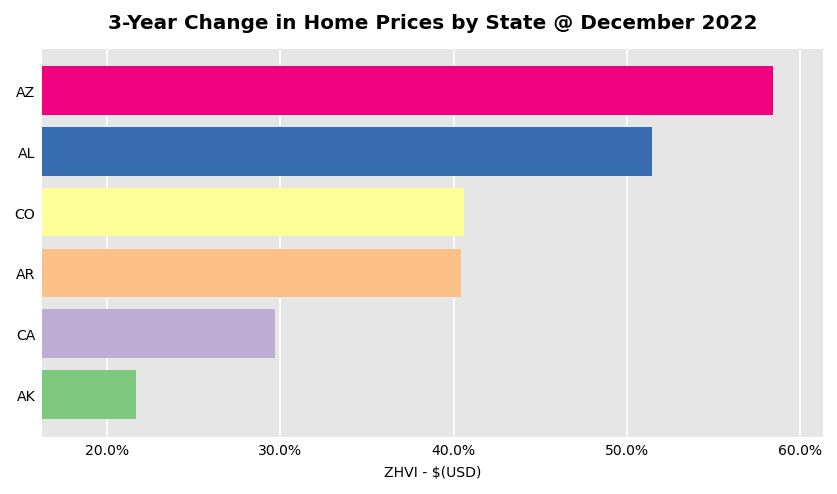

In [17]:
top6statesbypct = zhvi_timeseries.groupby(level='State',axis=1).mean().pct_change(periods=12*3).iloc[-1].head(6).sort_values(ascending=True)
barplot_by_location(top6statesbypct, axisformat = 'pct',title='3-Year Change in Home Prices by State @ December 2022')